In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Install Dependancies

In [2]:
!pip install tensorflowjs
!pip install tensorflow_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 2.6 MB/s 
     |████████████████████████████████| 40 kB 4.8 MB/s 
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.6 MB 4.7 MB/s 
     |████████████████████████████████| 511.7 MB 4.8 kB/s 
     |████████████████████████████████| 1.6 MB 62.0 MB/s 
     |████████████████████████████████| 5.8 MB 37.3 MB/s 
     |████████████████████████

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
import tensorflow_text as text
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from keras import backend as K
import os

# Read Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/pokemon_ml/text_dataset/descriptions.csv')
df.head()

,Unnamed: 0,Description,Label
0,0,"Using its ability to read minds, it will ident...",Abra
1,1,"Sleeps 18 hours a day. If it senses danger, it...",Abra
2,2,It senses impending attacks and TELEPORTS away...,Abra
3,3,"If it decides to TELEPORT randomly, it creates...",Abra
4,4,It hypnotizes itself so that it can teleport a...,Abra


In [ ]:
df.groupby('Label').apply(lambda x: x if len(x) > 1 else None)

,Unnamed: 0,Description,Label
0,0,"Using its ability to read minds, it will ident...",Abra
1,1,"Sleeps 18 hours a day. If it senses danger, it...",Abra
2,2,It senses impending attacks and TELEPORTS away...,Abra
3,3,"If it decides to TELEPORT randomly, it creates...",Abra
4,4,It hypnotizes itself so that it can teleport a...,Abra
...,...,...,...
3644,3644,It emits ultrasonic waves from its mouth to ch...,Zubat
3645,3645,"Zubat live in caves, down where the sun’s ligh...",Zubat
3646,3646,"Even though it has no eyes, it can sense obsta...",Zubat
3647,3647,"Disliking sunlight, it sleeps deep in forests ...",Zubat


In [ ]:
mapping = {}
for c, value in enumerate(df['Label'].value_counts().keys()):
  mapping[value] = c
mapping

{'Abra': 0,
 'Aerodactyl': 60,
 'Alakazam': 14,
 'Arbok': 136,
 'Arcanine': 52,
 'Articuno': 140,
 'Beedrill': 148,
 'Bellsprout': 149,
 'Blastoise': 113,
 'Bulbasaur': 139,
 'Butterfree': 81,
 'Caterpie': 80,
 'Chansey': 26,
 'Charizard': 117,
 'Charmander': 118,
 'Charmeleon': 116,
 'Clefable': 21,
 'Clefairy': 22,
 'Cloyster': 76,
 'Cubone': 77,
 'Dewgong': 109,
 'Diglett': 78,
 'Ditto': 55,
 'Dodrio': 115,
 'Doduo': 121,
 'Dragonair': 74,
 'Dragonite': 85,
 'Dratini': 84,
 'Drowzee': 95,
 'Dugtrio': 75,
 'Eevee': 42,
 'Ekans': 120,
 'Electabuzz': 32,
 'Electrode': 124,
 'Exeggcute': 82,
 'Exeggutor': 79,
 'Farfetchd': 137,
 'Fearow': 90,
 'Flareon': 44,
 'Gastly': 31,
 'Gengar': 30,
 'Geodude': 29,
 'Gloom': 96,
 'Golbat': 1,
 'Goldeen': 19,
 'Golduck': 3,
 'Golem': 18,
 'Graveler': 23,
 'Grimer': 54,
 'Growlithe': 53,
 'Gyarados': 12,
 'Haunter': 28,
 'Hitmonchan': 135,
 'Hitmonlee': 131,
 'Horsea': 94,
 'Hypno': 98,
 'Ivysaur': 130,
 'Jigglypuff': 36,
 'Jolteon': 35,
 'Jynx': 102

# Visual Dataset

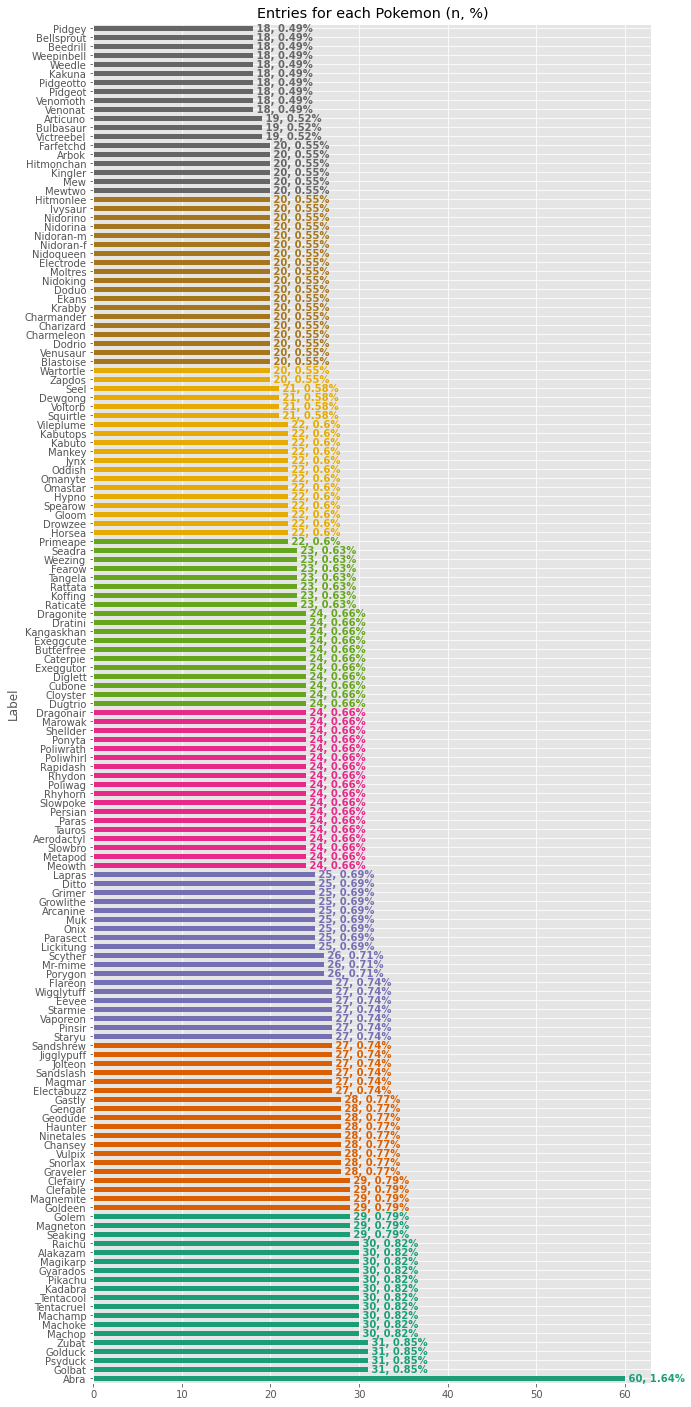

In [ ]:
plt.style.use('ggplot')

num_classes = len(df["Label"].value_counts())

colors = plt.cm.Dark2(np.linspace(0, 1, num_classes))
iter_color = iter(colors)

df['Label'].value_counts().plot.barh(title="Entries for each Pokemon (n, %)", 
                                                 ylabel="Label",
                                                 color=colors,
                                                 figsize=(10,25))

for i, v in enumerate(df['Label'].value_counts()):
  c = next(iter_color)
  plt.text(v, i,
           " "+str(v)+", "+str(round(v*100/df.shape[0],2))+"%", 
           color=c, 
           va='center', 
           fontweight='bold')

In [ ]:
df['Labels'] = df['Label'].map(mapping)

In [ ]:
df = df.drop(['Label'], axis=1)
df

,Unnamed: 0,Description,Labels
0,0,"Using its ability to read minds, it will ident...",0
1,1,"Sleeps 18 hours a day. If it senses danger, it...",0
2,2,It senses impending attacks and TELEPORTS away...,0
3,3,"If it decides to TELEPORT randomly, it creates...",0
4,4,It hypnotizes itself so that it can teleport a...,0
...,...,...,...
3644,3644,It emits ultrasonic waves from its mouth to ch...,4
3645,3645,"Zubat live in caves, down where the sun’s ligh...",4
3646,3646,"Even though it has no eyes, it can sense obsta...",4
3647,3647,"Disliking sunlight, it sleeps deep in forests ...",4


# Classify into Training and Validation

In [ ]:
y = tf.keras.utils.to_categorical(df["Labels"].values, num_classes=num_classes)

x_train, x_test, y_train, y_test = train_test_split(df['Description'], y, test_size=0.25)

In [ ]:
preprocessor = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
encoder = hub.KerasLayer(
    "https://tfhub.dev/google/universal-sentence-encoder-cmlm/en-base/1")

In [ ]:
def get_embeddings(sentences):
  return encoder(preprocessor(sentences))["default"]

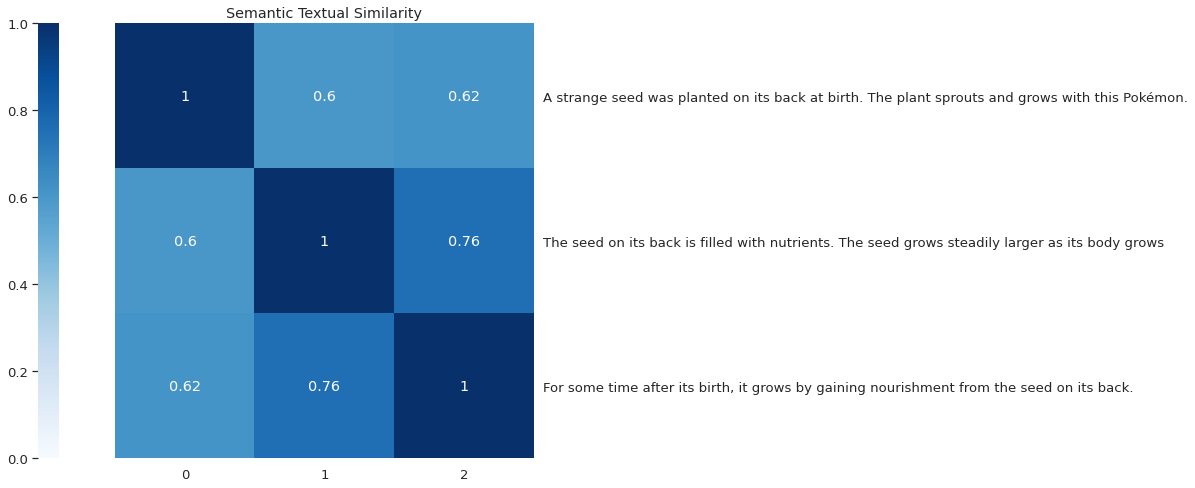

In [ ]:
def plot_similarity(features, labels):
    """Plot a similarity matrix of the embeddings."""
    cos_sim = cosine_similarity(features)
    fig = plt.figure(figsize=(10,8))
    sns.set(font_scale=1.2)
    cbar_kws=dict(use_gridspec=False, location="left")
    g = sns.heatmap(
        cos_sim, xticklabels=[i for i, c in enumerate(labels)], yticklabels=labels,
        vmin=0, vmax=1, annot=True, cmap="Blues", 
        cbar_kws=cbar_kws)
    g.tick_params(labelright=True, labelleft=False)
    g.set_yticklabels(labels, rotation=0)
    g.set_title("Semantic Textual Similarity")

desc = ["A strange seed was planted on its back at birth. The plant sprouts and grows with this Pokémon.",
        "The seed on its back is filled with nutrients. The seed grows steadily larger as its body grows",
        "For some time after its birth, it grows by gaining nourishment from the seed on its back."]
plot_similarity(get_embeddings(desc), desc)

# Training Model

In [ ]:
def balanced_recall(y_true, y_pred):
    """This function calculates the balanced recall metric
    recall = TP / (TP + FN)
    """
    recall_by_class = 0
    # iterate over each predicted class to get class-specific metric
    for i in range(y_pred.shape[1]):
        y_pred_class = y_pred[:, i]
        y_true_class = y_true[:, i]
        true_positives = K.sum(K.round(K.clip(y_true_class * y_pred_class, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true_class, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        recall_by_class = recall_by_class + recall
    return recall_by_class / y_pred.shape[1]

def balanced_precision(y_true, y_pred):
    """This function calculates the balanced precision metric
    precision = TP / (TP + FP)
    """
    precision_by_class = 0
    # iterate over each predicted class to get class-specific metric
    for i in range(y_pred.shape[1]):
        y_pred_class = y_pred[:, i]
        y_true_class = y_true[:, i]
        true_positives = K.sum(K.round(K.clip(y_true_class * y_pred_class, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred_class, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        precision_by_class = precision_by_class + precision
    # return average balanced metric for each class
    return precision_by_class / y_pred.shape[1]

def balanced_f1_score(y_true, y_pred):
    """This function calculates the F1 score metric"""
    precision = balanced_precision(y_true, y_pred)
    recall = balanced_recall(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

In [ ]:
i = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
x = preprocessor(i)
x = encoder(x)
x = tf.keras.layers.Dropout(0.2, name="dropout")(x['default'])
x = tf.keras.layers.Dense(num_classes, activation='softmax', name="output")(x)

model = tf.keras.Model(i, x)

In [ ]:
n_epochs = 10

METRICS = [
      tf.keras.metrics.CategoricalAccuracy(name="accuracy"),
#       balanced_recall,
#       balanced_precision,
#       balanced_f1_score
]

earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", 
                                                      patience = 3,
                                                      restore_best_weights = True)

checkpoint_path = "/content/drive/MyDrive/pokemon_ml/text_checkpoints2/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

model.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = METRICS)

In [ ]:
# model.load_weights(checkpoint_path)

model_fit = model.fit(x_train, 
                      y_train, 
                      epochs = n_epochs,
                      validation_data = (x_test, y_test),
                      callbacks = [earlystop_callback, cp_callback])

Epoch 1/10
86/86 [==============================] - ETA: 0s - loss: 0.3469 - accuracy: 0.9751 
Epoch 1: saving model to /content/drive/MyDrive/pokemon_ml/text_checkpoints2/cp.ckpt
86/86 [==============================] - 1748s 20s/step - loss: 0.3469 - accuracy: 0.9751 - val_loss: 0.2874 - val_accuracy: 0.9869
Epoch 2/10
86/86 [==============================] - ETA: 0s - loss: 0.3185 - accuracy: 0.9773 
Epoch 2: saving model to /content/drive/MyDrive/pokemon_ml/text_checkpoints2/cp.ckpt
86/86 [==============================] - 1695s 20s/step - loss: 0.3185 - accuracy: 0.9773 - val_loss: 0.2819 - val_accuracy: 0.9880
Epoch 3/10
86/86 [==============================] - ETA: 0s - loss: 0.2978 - accuracy: 0.9817 
Epoch 3: saving model to /content/drive/MyDrive/pokemon_ml/text_checkpoints2/cp.ckpt
86/86 [==============================] - 1763s 21s/step - loss: 0.2978 - accuracy: 0.9817 - val_loss: 0.2753 - val_accuracy: 0.9880
Epoch 4/10
86/86 [==============================] - ETA: 0s - lo

# Visual Results

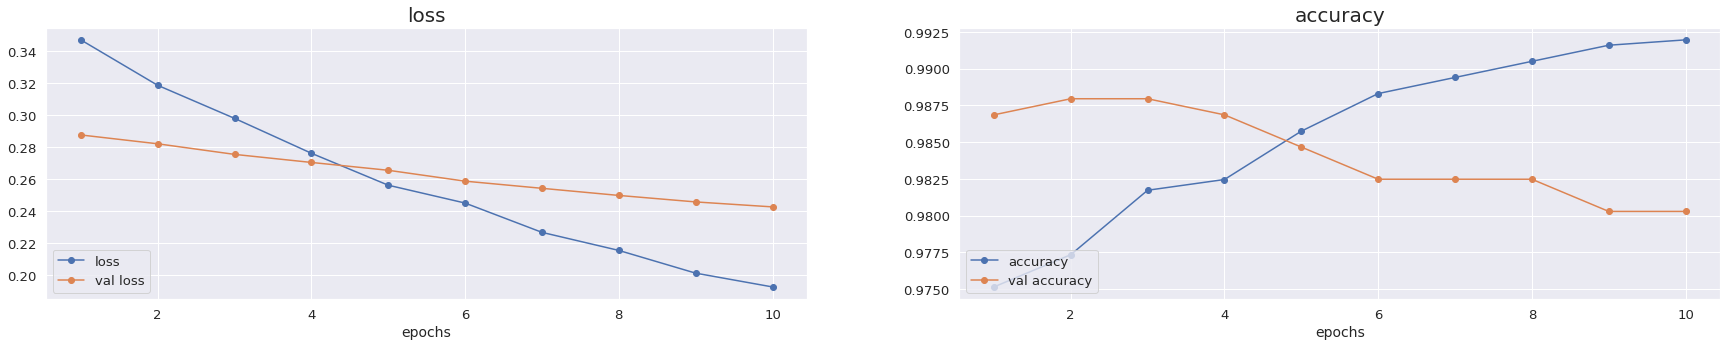

In [ ]:
x = list(range(1, n_epochs+1))
metric_list = list(model_fit.history.keys())
num_metrics = int(len(metric_list)/2)

fig, ax = plt.subplots(nrows=1, ncols=num_metrics, figsize=(30, 5))

for i in range(0, num_metrics):
  ax[i].plot(x, model_fit.history[metric_list[i]], marker="o", label=metric_list[i].replace("_", " "))
  ax[i].plot(x, model_fit.history[metric_list[i+num_metrics]], marker="o", label=metric_list[i+num_metrics].replace("_", " "))
  ax[i].set_xlabel("epochs",fontsize=14)
  ax[i].set_title(metric_list[i].replace("_", " "),fontsize=20)
  ax[i].legend(loc="lower left")

# Save the model

In [ ]:
model.save("/content/drive/MyDrive/pokemon_ml/models/text_classifier4")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/pokemon_ml/models/text_classifier4/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/pokemon_ml/models/text_classifier4/assets


# Predict on new data

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/pokemon_ml/text_dataset/test_description.csv')
test_df.head()

,Unnamed: 0,Pokemon,Description
0,0,Abra,This Pokémon uses its psychic powers while it ...
1,1,Aerodactyl,This is a ferocious Pokémon from ancient times...
2,2,Alakazam,It has an incredibly high level of intelligenc...
3,3,Arbok,The frightening patterns on its belly have bee...
4,4,Arcanine,"The sight of it running over 6,200 miles in a ..."


In [ ]:
def predict_class(desc):
  return [np.argmax(pred) for pred in model.predict(desc)]

descriptions = test_df['Description']
predictions = predict_class(descriptions)

5/5 [==============================] - 74s 14s/step


In [ ]:
def get_value(val):
  for k, v in mapping.items():
    if v == val:
      return k

for c, idx in enumerate(predictions):
  poke = get_value(idx)
  if poke != test_df['Pokemon'][c]:
    print(f"Guessed {poke} Actual {test_df['Pokemon'][c]}")
    # print(test_df['Description'][c])

Guessed Zubat Actual Nidoran-f


In [4]:
restored_model = tf.keras.models.load_model("/content/drive/MyDrive/pokemon_ml/models/text_classifier4")

In [5]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(restored_model, "/content/drive/MyDrive/pokemon_ml/models/tfjs_model")

In [ ]:
get_value(np.argmax(restored_model.predict(["powerful electricity cheek sacs"])))

In [ ]:
def balanced_recall(y_true, y_pred):
    return 1
    
def balanced_precision(y_true, y_pred):
    return 1

def balanced_f1_score(y_true, y_pred):
    return 1

restoredh5_model = tf.keras.models.load_model("model.h5", custom_objects={
                                        "KerasLayer": hub.KerasLayer,
                                        'CategoricalAccuracy': tf.keras.metrics.CategoricalAccuracy(name="accuracy"),
                                        "balanced_recall": balanced_recall,
                                        "balanced_precision": balanced_precision,
                                        "balanced_f1_score": balanced_f1_score
                                        })

In [ ]:
get_value(np.argmax(restored_model.predict(["powerful electricity cheek sacs"])))

In [ ]:
tf.saved_model.save(restored_model, "/content/drive/MyDrive/pokemon_ml/models/text_classifier4")

In [ ]:
loaded = tf.saved_model.load("/content/drive/MyDrive/pokemon_ml/models/text_classifier4")